In [12]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
import numpy as np

%matplotlib inline

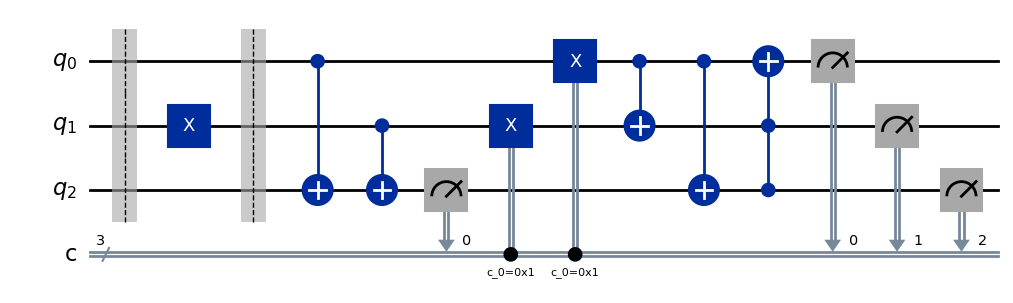

In [13]:
# Create a quantum circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)

# Encode |0> as |000> and |1> as |111>
# Assume we want to encode |0> -> |000>
qc.barrier()

# Introduce a bit-flip error on the second qubit
qc.x(1)
qc.barrier()

# Syndrome measurement to detect errors
qc.cx(0, 2)
qc.cx(1, 2)
qc.measure(2, 0)  # Measure the syndrome

# Correct the error based on the syndrome measurement
qc.x(1).c_if(0, 1)  # If the syndrome is 1, flip the second qubit
qc.x(0).c_if(0, 1)  # If the syndrome is 1, flip the first qubit

# Decode the logical qubit back to the first qubit
qc.cx(0, 1)
qc.cx(0, 2)
qc.ccx(1, 2, 0)

# Measure the logical qubit
qc.measure([0, 1, 2], [0, 1, 2])

qc.draw(output='mpl')

{'011': 1024}


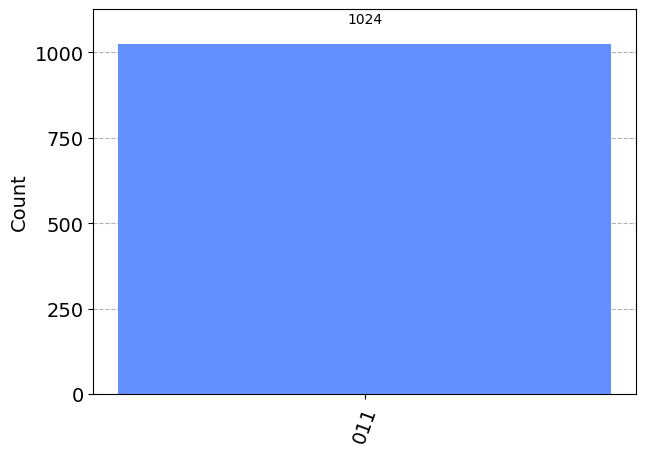

In [14]:
simulator = BasicSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
print(result.get_counts())
plot_histogram(result.get_counts())

In [34]:
import numpy as np

# Define the computational basis states for 3 qubits (8-dimensional vectors)

ket_011 = np.array([0, 0, 0, 1, 0, 0, 0, 0])
ket_100 = np.array([0, 0, 0, 0, 1, 0, 0, 0])


# Define the state |psi>
psi = 1/np.sqrt(2) * (ket_100 + ket_011)

# Define the Pauli Z matrix
Z = np.array([[1, 0],
              [0, -1]])

# Define the identity matrix
I = np.eye(2)

# Construct the Z1 Z2 operator for three qubits
Z1_Z2 = np.kron(np.kron(Z, Z), I)

# Calculate the expectation value <psi| Z1 Z2 |psi>
expectation_value = np.vdot(psi, Z1_Z2 @ psi)

print("Expectation value <psi| Z1Z2 |psi>:", expectation_value)


Expectation value <psi| Z1Z2 |psi>: -0.9999999999999998
